In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("C:/Archives/Internship/Data/Misc/covid19_all_countries.csv", usecols = [0,4,5,6,9], engine = 'python')
df = df.rename(columns = {'dateRep':'date', 'countriesAndTerritories':'country','popData2018': 'pop'}) # rename columns
df.date = pd.to_datetime(df.date, infer_datetime_format=True) # datetime
df.head()

,date,cases,deaths,country,pop
0,2020-03-27,0,0,Afghanistan,37172386.0
1,2020-03-26,33,0,Afghanistan,37172386.0
2,2020-03-25,2,0,Afghanistan,37172386.0
3,2020-03-24,6,1,Afghanistan,37172386.0
4,2020-03-23,10,0,Afghanistan,37172386.0


In [24]:
# Country population dictionary
country_pop = (df.groupby('country').pop.mean())
country_pop = country_pop.to_dict()

In [70]:
# Country level COVID-19
def ts(country, alpha):
    c = df[df.country == country][['date','cases','deaths']].set_index('date')
    c['cases_expsm'] = c.cases.ewm(alpha = alpha).mean()
    return c

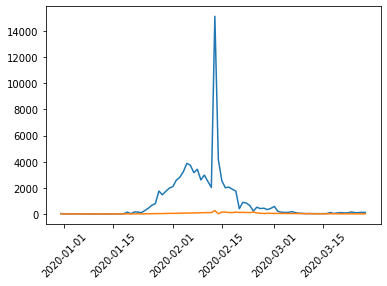

In [92]:
# Country-Plot
df_country = ts('China', alpha = 0.3)
plt.plot(df_country.index, df_country.cases)
plt.plot(df_country.index, df_country.deaths)
plt.xticks(rotation = 45)
plt.show()

#### Suspected Infected Recovered (SIR) Model

Modelling assumptions listed here: 
https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model

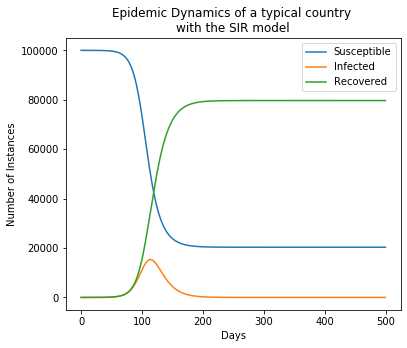

In [93]:
from scipy.integrate import odeint

# state space function

def model(z, t, b, k, N):
    S = z[0]
    I = z[1]
    R = z[2]
    dSdt = -b*S*I/N
    dIdt = b*S*I/N - k*I
    dRdt = k*I
    dzdt = (dSdt, dIdt, dRdt)
    return dzdt

# initial conditions
total_pop = 100000
infected = 1
recovered = 1
z0 = [total_pop - infected, infected, recovered]

# time points
n = 500
t = np.linspace(0,n-1,n)

# solution matrices
S = np.empty_like(t)
I = np.empty_like(t)
R = np.empty_like(t)

S[0],I[0],R[0] = z0[0], z0[1], z0[2]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]] 
    # solve for next step
    z = odeint(model, z0, tspan, args = (0.2, 0.1, total_pop-infected))
    # populate solution matrices
    S[i] = z[1][0]
    I[i] = z[1][1]
    R[i] = z[1][2]
    # next initial condition
    z0 = z[1]
    
# plot resuts
plt.figure(figsize = (6,5))
plt.plot(t,S, label = 'Susceptible')
plt.plot(t,I, label = 'Infected')
plt.plot(t,R, label = 'Recovered')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Number of Instances')
plt.title('Epidemic Dynamics of a typical country \nwith the SIR model')
plt.show()

#### Suspected Infected Suspected (SIS) Model

Model assumptions and details found here:
https://mysite.science.uottawa.ca/rsmith43/MAT4996/Epidemic.pdf

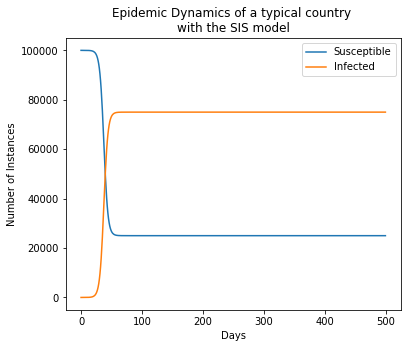

In [100]:
from scipy.integrate import odeint

# state space function

def model(z, t, a, b, N):
    S = z[0]
    I = z[1]
    dSdt = b*I - a*S*I/N
    dIdt = a*S*I/N - b*I
    dzdt = (dSdt, dIdt)
    return dzdt

# initial conditions
total_pop = 100000
infected = 1
recovered = 1
z0 = [total_pop - infected, infected]

# time points
n = 500
t = np.linspace(0,n-1,n)

# solution matrices
S = np.empty_like(t)
I = np.empty_like(t)

S[0],I[0] = z0[0], z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]] 
    # solve for next step
    z = odeint(model, z0, tspan, args = (0.4, 0.1, total_pop-infected))
    # populate solution matrices
    S[i] = z[1][0]
    I[i] = z[1][1]
    # next initial condition
    z0 = z[1]
    
# plot resuts
plt.figure(figsize = (6,5))
plt.plot(t,S, label = 'Susceptible')
plt.plot(t,I, label = 'Infected')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Number of Instances')
plt.title('Epidemic Dynamics of a typical country \nwith the SIS model')
plt.show()

#### Suspected Latent Infected Recovered Dead Suspected (SLIRDS) Model

Model assumptions and details found here: 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6926909/

In [ ]:
from scipy.integrate import odeint

# state space function

def model(z, t, a, b, N):
    S = z[0]
    L = z[1]
    I = z[2]
    R = z[3]
    D = z[4]
    dSdt = d*R - b*S*I/N
    
    dIdt = w*L + a*S*I/N - b*I
    
    dzdt = (dSdt, dIdt)
    return dzdt

# initial conditions
total_pop = 100000
infected = 1
recovered = 1
z0 = [total_pop - infected, infected]

# time points
n = 500
t = np.linspace(0,n-1,n)

# solution matrices
S = np.empty_like(t)
I = np.empty_like(t)

S[0],I[0] = z0[0], z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]] 
    # solve for next step
    z = odeint(model, z0, tspan, args = (0.4, 0.1, total_pop-infected))
    # populate solution matrices
    S[i] = z[1][0]
    I[i] = z[1][1]
    # next initial condition
    z0 = z[1]
    
# plot resuts
plt.figure(figsize = (6,5))
plt.plot(t,S, label = 'Susceptible')
plt.plot(t,I, label = 'Infected')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Number of Instances')
plt.title('Epidemic Dynamics of a typical country \nwith the SIS model')
plt.show()